# 맥도날드 매장입지 분석 


1. 거주 인구가 많은 지역에 맥도날드 매장이 밀집 ?
2. 직장인 많은 지역에 맥도날드 매장 밀집 ?

### 1. 맥도날드 데이터 수집 

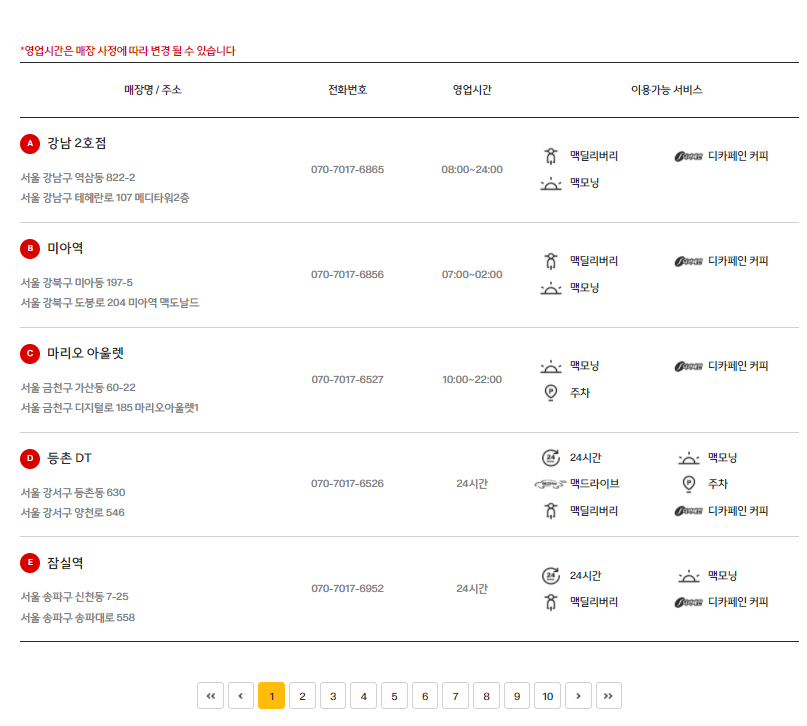

In [8]:
from selenium import webdriver 
from bs4 import BeautifulSoup
import pandas as pd 

In [9]:
# html parser 
html = driver.page_source 
soup = BeautifulSoup(html, 'html.parser')

In [5]:
driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe') 
url = 'https://www.mcdonalds.co.kr/kor/store/list.do'
driver.get(url)

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_9452/3875889446.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe')


1. 검색명 : 서울 1~ 20 page 
2. 검색결과 목록 -> 매장명, 위도 , 경도 ,주소(번지) , 매장 타입 (24/ 드라이브/ 딜리버리) 

* 매장 정보 수집 

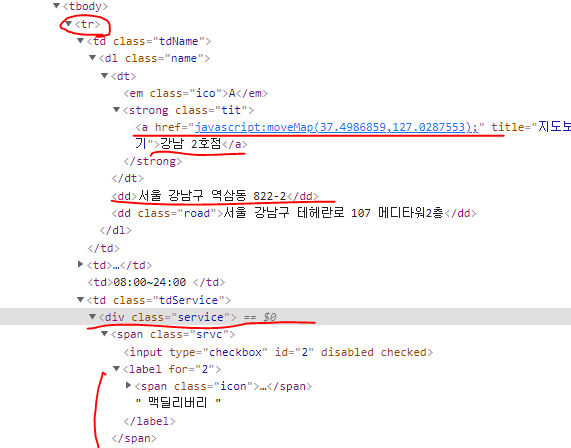

* 페이지당 매장 정보 최대 5
* 각 매장 정보는 < tr> 안에 
* 위도 경도 : strong > a href = ~ movemap(위도,경도) 
* 매장 이름 : strong > a > text
* 주소 : tr> df> dd[0]
* 매장타입 : div.service > span.srvc

매장정보 :
container > div.content > div.contArea > div > div > div.mcStore > table > tbody > tr  
'#' copyselector

In [74]:
# 서울시 맥도날드 매장정보 
dt_list=driver.find_elements_by_css_selector("#container > div.content > div.contArea > div > div > div.mcStore > table > tbody > tr")

macs = []
for data in dt_list:
        tmp = data.find_element_by_css_selector("td.tdName > dl > dt > strong > a")
        lat,lng = tmp.get_attribute("href")[19:-2].split(",")
        #원문이 javascript:moveMap(37.5667729,126.9794809);
        #형식이기 때문에 앞에 구문을 지워주고, ","를 기준으로 split해서 저장.
        title = tmp.text 
       
        macs.append([title,lat,lng])

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_9452/406769790.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  dt_list=driver.find_elements_by_css_selector("#container > div.content > div.contArea > div > div > div.mcStore > table > tbody > tr")


In [58]:
 macs

[['강남 2호점', '37.4986859', '127.0287553'],
 ['미아역', '37.626944', '127.026192'],
 ['마리오 아울렛', '37.4779193', '126.8872055'],
 ['등촌 DT', '37.5582134', '126.8597362'],
 ['잠실역', '37.5150646', '127.0996860']]

: 매장명 , 위도 , 경도 


* 주소와 매장 타입은 tr.text안에 

In [93]:
# 매장 타입 
a = driver.find_element_by_css_selector("td.tdService > div.service")
a.text.split('\n')

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_9452/422456638.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  a = driver.find_element_by_css_selector("td.tdService > div.service")


['맥딜리버리', '맥모닝', '디카페인 커피']

In [92]:
# 매장 주소 
add = data.find_element_by_css_selector("td.tdName > dl > dd")
add.text

'서울 강남구 역삼동 822-2'

* 모든 정보를 크롤링하는 함수 

In [102]:
# 서울시 맥도날드 매장정보 
dt_list=driver.find_elements_by_css_selector("#container > div.content > div.contArea > div > div > div.mcStore > table > tbody > tr")
macs = []

def crawling_page():
    for data in dt_list:
            tmp = data.find_element_by_css_selector("td.tdName > dl > dt > strong > a")
            lat,lng = tmp.get_attribute("href")[19:-2].split(",")
            #원문이 javascript:moveMap(37.5667729,126.9794809);
            #형식이기 때문에 앞에 구문을 지워주고, ","를 기준으로 split해서 저장.
            title = tmp.text 
            # 주소 
            add = data.find_element_by_css_selector("td.tdName > dl > dd").text
            #매장 타입 
            src= driver.find_element_by_css_selector("td.tdService > div.service").text.split('\n') 
        
            macs.append([title,add,lat,lng,src])

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_9452/689822093.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  dt_list=driver.find_elements_by_css_selector("#container > div.content > div.contArea > div > div > div.mcStore > table > tbody > tr")


In [105]:
# 다음페이지 이동 함수 
def move_next(driver):
    
    next_btn = '#container > div.content > div.contArea > div > div > div.mcStore > div > a.arrow.next'
    next_btn.click()
    time.sleep(3)
    

In [109]:
def crawling_mac(): 
    for i in range(12) # page
    try :
        crawling_page()
        move_next(driver)
    except :
        time.sleep(2)
        move_next(driver)

SyntaxError: invalid syntax (Temp/ipykernel_9452/1584774803.py, line 2)

In [114]:
macs = []

In [115]:
crawling_mac()

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_9452/689822093.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  src= driver.find_element_by_css_selector("td.tdService > div.service").text.split('\n')


In [116]:
macs

[['강남 2호점',
  '서울 강남구 역삼동 822-2',
  '37.4986859',
  '127.0287553',
  ['맥딜리버리', '맥모닝', '디카페인 커피']],
 ['미아역',
  '서울 강북구 미아동 197-5',
  '37.626944',
  '127.026192',
  ['맥딜리버리', '맥모닝', '디카페인 커피']],
 ['마리오 아울렛',
  '서울 금천구 가산동 60-22',
  '37.4779193',
  '126.8872055',
  ['맥딜리버리', '맥모닝', '디카페인 커피']],
 ['등촌 DT',
  '서울 강서구 등촌동 630',
  '37.5582134',
  '126.8597362',
  ['맥딜리버리', '맥모닝', '디카페인 커피']],
 ['잠실역',
  '서울 송파구 신천동 7-25',
  '37.5150646',
  '127.0996860',
  ['맥딜리버리', '맥모닝', '디카페인 커피']]]

### 한페이지 내 의 매장정보 수집 o
### 다음 페이지 넘어가는 것 구현 x! 